# Project: STP Machathon 1.0 - [Egypt restaurants dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#data_processing">Data Processing for Models</a></li>
<li><a href="#ml">Machine Learning Models</a></li>
<li><a href="#dl">Deep Learning Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Restaurants dataset is a big dataset which contain a lot of data about all egypt restaurants like (restaurant features, cuisine, and Area of the restaurant).


### Task: 
> Predict the restaurant ratings based on their features.

In [1]:
# Packages for data processing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Packages for ML model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as er
from sklearn.metrics import f1_score


#Packages for DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow import config

config.run_functions_eagerly(True)

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv(r"train.csv")

df.head()

,user_uuid,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings
0,4f0181917069f1bf5259c04f14a944c49d461bab,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5
1,06c7a3629566f04e19611981d0fb30dabe8d8daa,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4
2,966acbc0eaf5c2cda02a242ec9caf75f98119ef9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4
3,a910926f38c18c2e00a338c7d2f6e03ee78ea7a4,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1
4,aa25b862b3f7fbd71425170343c53dcd93ec10c9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4


In [3]:
df.shape

(79395, 8)

In [4]:
df.columns

Index(['user_uuid', 'restaurant_uuid', 'discounted', 'area', 'nOrders',
       'cuisine', 'restaurant_features', 'Ratings'],
      dtype='object')

In [5]:
df.dtypes

user_uuid              object
restaurant_uuid        object
discounted              int64
area                   object
nOrders                 int64
cuisine                object
restaurant_features    object
Ratings                 int64
dtype: object

In [6]:
df.isnull().sum()

user_uuid              0
restaurant_uuid        0
discounted             0
area                   0
nOrders                0
cuisine                0
restaurant_features    0
Ratings                0
dtype: int64

In [7]:
df['cuisine'].unique()

array(["['Egyptian' 'Oriental' 'Grill']",
       "['Burgers' 'Sandwiches' 'Fast Food']", "['Pizza' 'Fast Food']",
       "['Pizza' 'Oriental' 'Sandwiches' 'Grill']",
       "['Sandwiches' 'Bakeries and Pastries']", "['Fast Food']",
       "['Egyptian' 'Sandwiches']",
       "['Egyptian' 'Oriental' 'Foul we Ta3meya']",
       "['Pizza' 'Egyptian']", "['Bakeries and Pastries' 'Desserts']",
       "['Fast Food' 'Chicken']", "['Oriental']", "['Grill' 'Syrian']",
       "['Burgers' 'Sandwiches']", "['International']",
       "['Egyptian' 'Fast Food']",
       "['Oriental' 'Sandwiches' 'Fast Food' 'Vegetarian']",
       "['Egyptian' 'Koshary']", "['Sandwiches' 'Fast Food' 'Grill']",
       "['Oriental' 'Syrian']", "['Sandwiches' 'Fast Food' 'Syrian']",
       "['German' 'Chicken']", "['Burgers' 'Sandwiches' 'Chicken']",
       "['Sandwiches' 'Syrian']",
       "['Egyptian' 'Sandwiches' 'Koshary' 'Foul we Ta3meya']",
       "['Pizza']", "['Pizza' 'American']", "['Oriental' 'Grill']",
       "

In [8]:
df['restaurant_features'].unique()

array(["['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Grill' 'Catering']",
       "['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Friendly' 'Playground' '24 hrs']",
       "['No Smoking Area' 'Khorogat Iftar' 'Catering']", "['24 hrs']",
       "['Khorogat Iftar']",
       "['No Smoking Area' 'Breakfast' 'Work Or Study' 'Coffeeshops']",
       "['No Smoking Area' 'TV' 'WiFi']", "['No Smoking Area']",
       "['Outdoor']",
       "['Outdoor' 'TV' 'Breakfast' 'Sohour w Khorouga' 'Catering' 'Cheap Eats']",
       "['Outdoor' '24 hrs']", "['Outdoor' 'Catering']",
       "['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Khorogat Iftar']",
       "['Outdoor' 'Khorogat Iftar' 'Catering']",
       "['No Smoking Area' 'Casual Dining' 'Outdoor']",
       "['No Smoking Area' 'Casual Dining' 'Outdoor' 'Catering']",
       "['No Smoking Area' 'WiFi' 'Cheap Eats']",
       "['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats']",
       "['Outdoor' 'Drive-ins' 'Catering' 'Cheap Eats']",
       "['No Smoking Area' 'Outdoor' 'TV' 

### Data Cleaning

> Dropping the user_uuid column

> Cleaning some unique features in restaurant_features column

> Cleaning some unique features in restaurant_features column

#### Dropping the user_uuid column

In [9]:
df = df.drop('user_uuid', axis=1)
df.head()

,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings
0,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5
1,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4
2,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4
3,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1
4,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4


#### Cleaning the rar unique values in the restaurant_features column

In [10]:
# Removing any rar word from any line
df['restaurant_features']=[df['restaurant_features'][i].replace("\n ", " ") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace("], dtype=object))", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"array([", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"],      dtype=object)", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"], dtype=object)", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"       ", "") for i in range(df['restaurant_features'].count())]

# Replacing the (, ) with space that can we deal with 
df['restaurant_features']=[df['restaurant_features'][i].replace(r", ", " ") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r',', " ") for i in range(df['restaurant_features'].count())]

In [11]:
# New Column to Splitt the string into list of features

df['resFeatures'] = [df['restaurant_features'][i].split("' '") for i in range(df['restaurant_features'].count())]
for i in range(df['resFeatures'].count()):
    if df['resFeatures'][i][0] == " ":
        df['resFeatures'][i][0] = df['resFeatures'][i][0].strip(" ")
    if df['resFeatures'][i][-1] == " ":
        df['resFeatures'][i][-1] = df['resFeatures'][i][0].strip(" ")

df['resFeatures'] = [df['restaurant_features'][i].split("' '") for i in range(df['restaurant_features'].count())]
for i in range(df['resFeatures'].count()):
    df['resFeatures'][i][0] = df['resFeatures'][i][0].strip("['")
    df['resFeatures'][i][-1] = df['resFeatures'][i][-1].strip("']")
df['resFeatures']

0        [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
1        [No Smoking Area, Outdoor, WiFi, Kids-Friendly...
2              [No Smoking Area, Khorogat Iftar, Catering]
3                                                 [24 hrs]
4              [No Smoking Area, Khorogat Iftar, Catering]
                               ...                        
79390                                    [No Smoking Area]
79391    [No Smoking Area, Casual Dining, Outdoor, WiFi...
79392                                    [No Smoking Area]
79393    [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
79394    [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
Name: resFeatures, Length: 79395, dtype: object

#### Cleaning the rar unique values in the cuisine column 

In [12]:
df['cuisine']=[df['cuisine'][i].replace("\n ", " ") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace("], dtype=object))", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"array([", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"],      dtype=object)", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"], dtype=object)", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"       ", "") for i in range(df['cuisine'].count())]

# # Replacing the (, ) with space that can we deal with 
df['cuisine']=[df['cuisine'][i].replace(r", ", " ") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r',', " ") for i in range(df['cuisine'].count())]

In [13]:
# New Column to Splitt the string into list of features
df['resCuisine'] = [df['cuisine'][i].split("' '") for i in range(df['cuisine'].count())]
for i in range(df['resCuisine'].count()):
    df['resCuisine'][i][0] = df['resCuisine'][i][0].strip("['")
    df['resCuisine'][i][-1] = df['resCuisine'][i][-1].strip("']")

In [14]:
df.head()

,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings,resFeatures,resCuisine
0,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5,"[No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...","[Egyptian, Oriental, Grill]"
1,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4,"[No Smoking Area, Outdoor, WiFi, Kids-Friendly...","[Burgers, Sandwiches, Fast Food]"
2,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]"
3,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1,[24 hrs],"[Pizza, Fast Food]"
4,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]"


In [15]:
type(df['resCuisine'][0]), type(df['resFeatures'])

(list, pandas.core.series.Series)

<a id='eda'></a>
## Exploratory Data Analysis

#### Showing the distribution of areas 

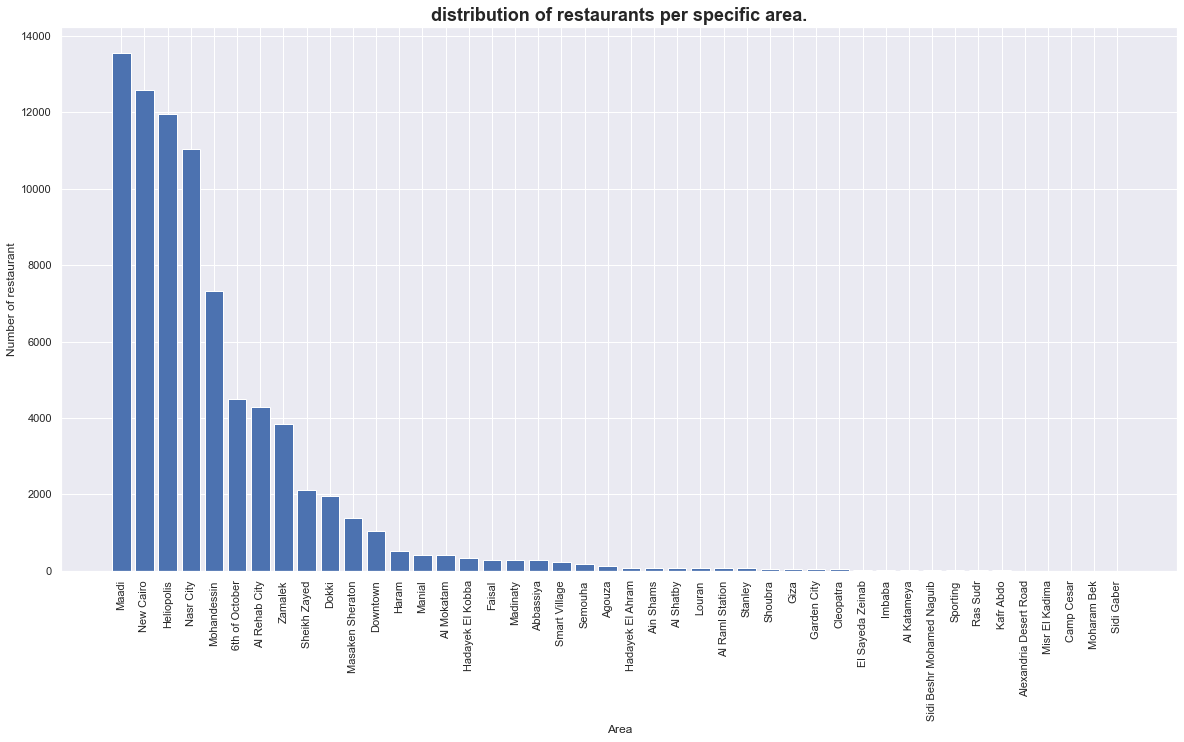

In [16]:
# Bar Chart for Area Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize = (20, 10))
plt.bar(height = list(df['area'].value_counts()), 
        x = list(df['area'].value_counts().keys()))
plt.xticks(rotation='vertical')
plt.title('distribution of restaurants per specific area.', fontsize = 18, fontweight = 'bold')
plt.xlabel('Area')
plt.ylabel('Number of restaurant')
plt.show()

From the graph we can detect that **Cairo** has a big number of restaurants specially **Maadi city**.

#### Showing the distribution of nOrders

In [17]:
df['nOrders'].value_counts()

1     61250
2     12206
3      3620
4      1302
5       500
6       223
7       118
8        75
9        27
10       19
11       16
12       10
13        9
14        6
17        3
20        3
15        2
16        2
25        1
18        1
22        1
39        1
Name: nOrders, dtype: int64

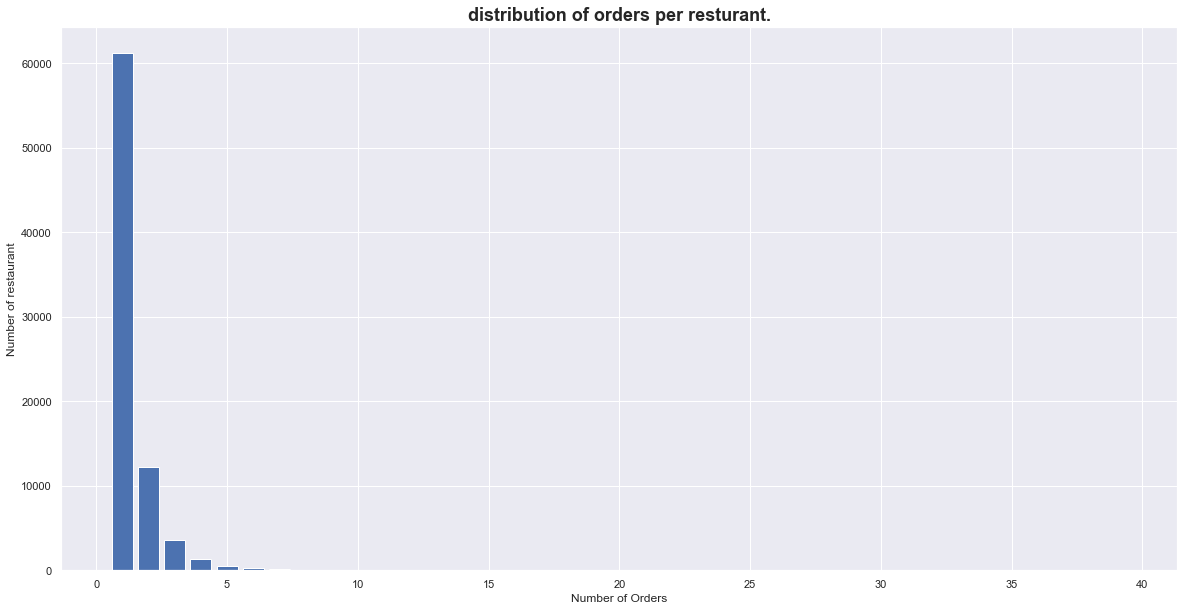

In [18]:
# Bar Chart for nOrders Distribution

sns.set_theme(style="darkgrid")
plt.figure(figsize = (20, 10))
plt.bar(height = list(df['nOrders'].value_counts()), 
        x = list(df['nOrders'].value_counts().keys()))
plt.title('distribution of orders per resturant.', fontsize = 18, fontweight = 'bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of restaurant')
plt.show()

<a id='data_processing'></a>

## Data Processing for the model

### Area Column

In [19]:
area = df['area']
area_numerical = pd.get_dummies(area)
area_numerical.head()

,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,...,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,Smart Village,Sporting,Stanley,Zamalek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Restaurant Cuisine Column

In [20]:
binCuisine = MultiLabelBinarizer()
multilabel_encoded_results1 = binCuisine.fit_transform(df['resCuisine'])
# Classes created in MultiLabel data after Encoding
binCuisine.classes_

array(['American', 'Argentinian', 'Asian', 'Bakeries and Pastries',
       'Burgers', 'Chicken', 'Chinese', 'Coffee & Drinks', 'Desserts',
       'Egyptian', 'European', 'Fast Food', 'Foul we Ta3meya', 'French',
       'German', 'Grill', 'Indian', 'International', 'Italian',
       'Japanese', 'Koshary', 'Lebanese', 'Mexican', 'Oriental', 'Pizza',
       'Sandwiches', 'Seafood', 'Spanish', 'Steaks', 'Sushi', 'Syrian',
       'Tarts and chocolates', 'Tex-Mex', 'Thai', 'Turkish', 'Vegetarian'],
      dtype=object)

### Restaurant Features Column

In [21]:
binFeatures = MultiLabelBinarizer()
multilabel_encoded_results = binFeatures.fit_transform(df['resFeatures'])
# Classes created in MultiLabel data after Encoding
binFeatures.classes_

array(['24 hrs', 'Alcohol', 'Breakfast', 'Breakfast in Sahel',
       'Casual Dining', 'Catering', 'Cheap Eats', 'Coffee Places',
       'Coffeeshops', 'Drive-ins', 'Fancy Dining', 'Food with a View',
       'Grill', 'Hidden Gems', 'Iftar', 'Iftar Open Buffet',
       'Khorogat Iftar', 'Kids-Friendly', 'Live Music', 'Nile/Sea View',
       'No Smoking Area', 'Open During Day', 'Outdoor', 'Pet Friendly',
       'Playground', 'Post Fetar Hangouts', 'Pride of Alex',
       'Ramadan Fel Hussein', 'Ramadan Tents', 'Romantic', 'Shisha',
       'Sohour w Khorouga', 'Sokhna Seafood', 'Street Food', 'TV', 'WiFi',
       'Work Or Study'], dtype=object)

### Restaurant ID Column

In [22]:
res_id = df['restaurant_uuid']
res_id_numerical = pd.get_dummies(res_id)
res_id_numerical.head()

,00069db0b2846a182ad1d4915e15e71cce579b8e,00230bc752a3900be18377f942254de8e9dc2493,00818e1dc8b099185ad1b126625c46bdf2e66f25,00e1b9c373017f45d44095bdf59a692e4362990e,0108e1c5a9fa319955049505c3ffa97cd14ca999,01e2c50969cc4865399e50d036fa33f771e459ad,0213263e1987aa16c6532b6882887c50955686ea,02b3a9d8a3bf056882fe2c792311253197f9d948,03defb2ea6dc0343576ccba926218df40d9b7e8c,0413f4c116cfd67150f6ef8b02ed0501ad4b2f56,...,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Adding The processed columns to the dataframe

In [23]:
df[area_numerical.columns] = area_numerical
df[binFeatures.classes_] = multilabel_encoded_results
df[binCuisine.classes_] = multilabel_encoded_results1
df[res_id_numerical.columns]=res_id_numerical
df

,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings,resFeatures,resCuisine,6th of October,...,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5,"[No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...","[Egyptian, Oriental, Grill]",0,...,0,0,0,0,0,0,0,0,0,0
1,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4,"[No Smoking Area, Outdoor, WiFi, Kids-Friendly...","[Burgers, Sandwiches, Fast Food]",0,...,0,0,0,0,0,0,0,0,0,0
2,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]",0,...,0,0,0,0,0,0,0,0,0,0
3,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1,[24 hrs],"[Pizza, Fast Food]",0,...,0,0,0,0,0,0,0,0,0,0
4,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79390,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Nasr City,3,['Egyptian' 'Fast Food'],['No Smoking Area'],5,[No Smoking Area],"[Egyptian, Fast Food]",0,...,0,0,0,0,0,0,0,0,0,0
79391,5f05a1ca558b36c593f2ab9f552f7fadbed9c383,0,Heliopolis,1,['Asian' 'Japanese' 'Sushi' 'Steaks'],['No Smoking Area' 'Casual Dining' 'Outdoor' '...,5,"[No Smoking Area, Casual Dining, Outdoor, WiFi...","[Asian, Japanese, Sushi, Steaks]",0,...,0,0,0,0,0,0,0,0,0,0
79392,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,1,Maadi,2,['Egyptian' 'Fast Food'],['No Smoking Area'],5,[No Smoking Area],"[Egyptian, Fast Food]",0,...,0,0,0,0,0,0,0,0,0,0
79393,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,New Cairo,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,4,"[No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...","[Egyptian, Oriental, Grill]",0,...,0,0,0,0,0,0,0,0,0,0


#### Dropping the used columns

In [24]:
df.drop(columns=['area','restaurant_uuid','cuisine','restaurant_features', 'resFeatures', 'resCuisine'], inplace=True)
df.head()

,discounted,nOrders,Ratings,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,...,fb2c9586975362dd590043d82c9e7123da9907e4,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb
0,0,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Make Ratings is the last column to split the data easy

In [25]:
y = df['Ratings']
df.drop(['Ratings'], axis=1, inplace=True)
df['Ratings'] = y
df.head()

,discounted,nOrders,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,...,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb,Ratings
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


#### Data Normalization

In [26]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,discounted,nOrders,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,...,fbd68cd9610e3a841c2046b7eb75c866474503b8,fbe5eb5a1b711fb272d77dbc323468db244ebce6,fc19f0508a2eebbbe09a42aa4317eb5f626887b3,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,fd84ea003fba62dca0e0581411bc77346515f5c8,fdcfd760d9df4033b416f2914ecc7a08ae526fa6,fdebb7f97dc1c27099b6fb7f8e0d50ee7b315a6f,fe426dc4086d3d3e0ed509a5f9488f57b7e95888,fec195aae08994eed95656b4928e861e7597b5cb,Ratings
0,-0.557686,-0.406397,-0.244947,-0.059277,-0.041727,-0.031759,-0.013746,-0.071248,-0.028625,-0.238969,...,-0.005019,-0.008694,-0.007936,-0.02818,-0.010648,-0.014197,-0.060338,-0.003549,-0.03075,5
1,-0.557686,-0.406397,-0.244947,-0.059277,-0.041727,-0.031759,-0.013746,-0.071248,-0.028625,-0.238969,...,-0.005019,-0.008694,-0.007936,-0.02818,-0.010648,-0.014197,-0.060338,-0.003549,-0.03075,4
2,-0.557686,1.833825,-0.244947,-0.059277,-0.041727,-0.031759,-0.013746,-0.071248,-0.028625,-0.238969,...,-0.005019,-0.008694,-0.007936,-0.02818,-0.010648,-0.014197,-0.060338,-0.003549,-0.03075,4
3,-0.557686,-0.406397,-0.244947,-0.059277,-0.041727,-0.031759,-0.013746,-0.071248,-0.028625,-0.238969,...,-0.005019,-0.008694,-0.007936,-0.02818,-0.010648,-0.014197,-0.060338,-0.003549,-0.03075,1
4,-0.557686,-0.406397,-0.244947,-0.059277,-0.041727,-0.031759,-0.013746,-0.071248,-0.028625,-0.238969,...,-0.005019,-0.008694,-0.007936,-0.02818,-0.010648,-0.014197,-0.060338,-0.003549,-0.03075,4


### Dividing the data into train and test

In [27]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<a id='ml'></a>
## Machine Learning Models

### SVC

#### Model Training

In [28]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)

SVC()

#### Model Prediction

In [29]:
svc_predict = svc_clf.predict(x_test)

#### Model Accuracy Calculation

In [30]:
f1_score(y_test, svc_predict,average='micro')

0.9883493922791108

### Random Forest Classifier

#### Model Training

In [31]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

#### Model Prediction

In [32]:
rf_predict = rf_clf.predict(x_test)

#### Model Accuracy Calculation

In [33]:
f1_score(y_test, rf_predict,average='micro')

0.9996851187102462

#### Cross Validation Model

In [34]:
results = cross_val_score(rf_clf, x, y)
results

array([0.99962214, 0.99987405, 0.99987405, 0.99955917, 0.99962214])

In [35]:
# Mean Accuarcy
sum(results)/5

0.9997103092134265

<a id='dl'></a>
## Deep Learning Model

In [36]:
X = df.iloc[:, :-1].values
Y = pd.get_dummies(df['Ratings'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [37]:
model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(df['Ratings'].value_counts()), activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               78848     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 87,429
Trainable params: 87,429
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, Y_train, epochs=30, verbose=2)

E:\Others\Programs\Annaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
E:\Others\Programs\Annaconda\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/30
1985/1985 - 24s - loss: 0.5362 - accuracy: 0.8233
Epoch 2/30
1985/1985 - 25s - loss: 0.1344 - accuracy: 0.9594
Epoch 3/30
1985/1985 - 25s - loss: 0.0705 - accuracy: 0.9790
Epoch 4/30
1985/1985 - 23s - loss: 0.0533 - accuracy: 0.9844
Epoch 5/30
1985/1985 - 23s - loss: 0.0409 - accuracy: 0.9885
Epoch 6/30
1985/1985 - 23s - loss: 0.0347 - accuracy: 0.9903
Epoch 7/30
1985/1985 - 23s - loss: 0.0324 - accuracy: 0.9905
Epoch 8/30
1985/1985 - 26s - loss: 0.0284 - accuracy: 0.9921
Epoch 9/30
1985/1985 - 23s - loss: 0.0283 - accuracy: 0.9930
Epoch 10/30
1985/1985 - 23s - loss: 0.0293 - accuracy: 0.9934
Epoch 11/30
1985/1985 - 22s - loss: 0.0236 - accuracy: 0.9938
Epoch 12/30
1985/1985 - 23s - loss: 0.0233 - accuracy: 0.9944
Epoch 13/30
1985/1985 - 26s - loss: 0.0200 - accuracy: 0.9945
Epoch 14/30
1985/1985 - 23s - loss: 0.0206 - accuracy: 0.9948
Epoch 15/30
1985/1985 - 25s - loss: 0.0200 - accuracy: 0.9948
Epoch 16/30
1985/1985 - 23s - loss: 0.0206 - accuracy: 0.9948
Epoch 17/30
1985/

In [40]:
dl_predict = model.predict(X_test)

In [41]:
f1_score(np.argmax(np.array(Y_test), axis=1), np.argmax(dl_predict, axis=1), average='micro')

0.9996221424522955

<a id='conclusions'></a>
## Conclusions

> Using of Data Analysis, Data Science, Machine Learning and Deep Learning Techniques to estimate the Resturant Ratings.

### Limitations
> I divided the dataframe into two dataframes and then dropped the null values of the second dataframe. 
